In [1]:
from keras.models import load_model
import os
import json
import numpy as np
import pandas as pd
from common_processing import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
test_model = load_model('./Checkpoints/Weight/fruit_classify_3_layers_resnet.h5')

In [3]:
#Generate test data
X_data = []
y_true = []
count = 0
all_path = './Data/Raw/testing/20200320/'
for folder in os.listdir(all_path):
    if '.' not in folder:
        lbl = count
        fld_path = all_path + folder + '/'
        for dirr in os.listdir(fld_path):
            if '_i.csv' in dirr:
                print(fld_path + dirr)
                df = pd.read_csv(fld_path + dirr)
                if len(df.columns) > 2:
                    df = df.loc[:, df.columns.intersection(['Wavelength (nm)', 'Sample Signal (unitless)'])]
                try:
                    dfnp = df.to_numpy()[:, 1]
                    X_data.append(preprocess_spectrum(dfnp))
#                     X_data.append(np.expand_dims(input_norm(calc_deriative(dfnp)), 1))
                    y_true.append(folder)
                except IndexError:
                    print(df)
#                     raise Exception
        count += 1
X_data = np.array(X_data)
y_true = np.array(y_true)

./Data/Raw/testing/20200320/apple/Column 1_008048_20200320_140621_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008049_20200320_140702_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008050_20200320_140718_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008051_20200320_140733_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008052_20200320_140749_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008053_20200320_140805_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008054_20200320_140818_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008055_20200320_140837_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008058_20200320_140921_i.csv
./Data/Raw/testing/20200320/apple/Column 1_017003_20200320_144216_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008056_20200320_140851_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008057_20200320_140906_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008059_20200320_140944_i.csv
./Data/Raw/testing/20200320/apple/Column 1_008060_20200320_14095

./Data/Raw/testing/20200320/dragon_fruit/Column 1_008027_20200320_135127_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008028_20200320_135142_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008029_20200320_135209_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008030_20200320_135230_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008031_20200320_135303_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008032_20200320_135318_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008035_20200320_135412_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_018012_20200320_145704_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008033_20200320_135334_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008034_20200320_135356_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008036_20200320_135501_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_008037_20200320_135520_i.csv
./Data/Raw/testing/20200320/dragon_fruit/Column 1_00

./Data/Raw/testing/20200320/mango/Column 1_008003_20200320_134228_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008005_20200320_134315_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008006_20200320_134337_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008007_20200320_134359_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008008_20200320_134425_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008009_20200320_134442_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008012_20200320_134539_i.csv
./Data/Raw/testing/20200320/mango/Column 1_016002_20200320_143346_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008010_20200320_134458_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008011_20200320_134521_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008013_20200320_134600_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008015_20200320_134654_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008016_20200320_134709_i.csv
./Data/Raw/testing/20200320/mango/Column 1_008017_20200320_13472

In [4]:
# y_true

In [5]:
print(X_data.shape)
print(y_true.shape)

(330, 224, 3)
(330,)


In [6]:
with open('./label_dict.json', 'r') as label_dict_file:
    label_dict = json.loads(label_dict_file.read())
print(label_dict)

['apple', 'avocado', 'dragon_fruit', 'guava', 'mango']


In [7]:
y_pred = test_model.predict(X_data)

In [8]:
y_pred = [label_dict[np.argmax(pred)] for pred in y_pred]

In [9]:
total_prediction = 0
total_correct = 0
for pred, label in zip(y_pred, y_true):
    total_prediction += 1
    if pred == label:
        total_correct += 1
    else:
        print('True: {} but predict: {}'.format(label, pred))
print('Test accuracy: {0:.2f}'.format(total_correct * 100/total_prediction))

True: apple but predict: mango
True: avocado but predict: dragon_fruit
True: dragon_fruit but predict: guava
True: mango but predict: avocado
Test accuracy: 98.79


[[65  0  0  0  1]
 [ 0 65  1  0  0]
 [ 0  0 65  1  0]
 [ 0  0  0 66  0]
 [ 0  1  0  0 65]]


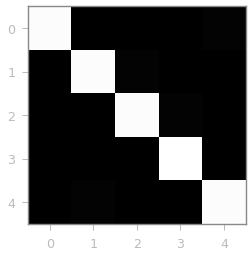

In [10]:
plt.imshow(confusion_matrix(y_true, y_pred), 'gray')
print(confusion_matrix(y_true, y_pred))